In [1]:
%matplotlib inline
from dateutil import parser # for parsing text-based dates
import pylab as PP
from numpy import *
import pandas as pd #for reading csv files easily
from scipy import stats
from matplotlib.pyplot import *

dataset = "Raw_data_for_ATM_298.csv"
data = pd.read_csv(dataset,skiprows = 3,)

In [2]:
data

Sample    Lat.   Long.   Depth   4He/3He  grams  step    CO2  \
0      AII 1076 579  54.030   7.260  3767.0   48300.0  2.732     1   28.1   
1               NaN     NaN     NaN     NaN       NaN    NaN     2   16.9   
2               NaN     NaN     NaN     NaN       NaN    NaN     3    7.9   
3     AII 1076 5725  54.030   7.260  3767.0   51000.0  3.377     1   17.6   
4               NaN     NaN     NaN     NaN       NaN    NaN     2   17.6   
5               NaN     NaN     NaN     NaN       NaN    NaN     3   15.9   
6    AII 1076 57252  54.030   7.260  3767.0   51000.0  2.264     1    NaN   
7               NaN     NaN     NaN     NaN       NaN    NaN     2    NaN   
8               NaN     NaN     NaN     NaN       NaN    NaN     3    NaN   
9               NaN     NaN     NaN     NaN       NaN    NaN     4    NaN   
10              NaN     NaN     NaN     NaN       NaN    NaN     5    NaN   
11              NaN     NaN     NaN     NaN       NaN    NaN     6    NaN   
12     AII 1076 575  54.030   7.260  3767.0   96400.0  3.963     1   17.8   
13              NaN     NaN     NaN     NaN       NaN    NaN     2   19.8   
14              NaN     NaN     NaN     NaN       NaN    NaN     3   65.6   
15              NaN     NaN     NaN     NaN       NaN    NaN     4   29.9   
16              NaN     NaN     NaN     NaN       NaN    NaN     5   73.5   
17              NaN     NaN     NaN     NaN       NaN    NaN     6   25.2   
18              NaN     NaN     NaN     NaN       NaN    NaN     7   52.4   
19              NaN     NaN     NaN     NaN       NaN    NaN     8   84.1   
20              NaN     NaN     NaN     NaN       NaN    NaN     9   53.9   
21              NaN     NaN     NaN     NaN       NaN    NaN    10   22.9   
22              NaN     NaN     NaN     NaN       NaN    NaN    11   27.7   
23              NaN     NaN     NaN     NaN       NaN    NaN    12    9.3   
24              NaN     NaN     NaN     NaN       NaN    NaN    13    4.5   
25      KN1629 3349  52.817  11.387  1436.0  120000.0  3.680     1   28.7   
26              NaN     NaN     NaN     NaN       NaN    NaN     2   46.5   
27              NaN     NaN     NaN     NaN       NaN    NaN     3   13.6   
28              NaN     NaN     NaN     NaN       NaN    NaN     4  110.3   
29              NaN     NaN     NaN     NaN       NaN    NaN     5   45.7   
..              ...     ...     ...     ...       ...    ...   ...    ...   
139             NaN     NaN     NaN     NaN       NaN    NaN     3   60.8   
140             NaN     NaN     NaN     NaN       NaN    NaN     4   61.6   
141             NaN     NaN     NaN     NaN       NaN    NaN     5   88.9   
142             NaN     NaN     NaN     NaN       NaN    NaN     6  109.2   
143             NaN     NaN     NaN     NaN       NaN    NaN     7   90.8   
144             NaN     NaN     NaN     NaN       NaN    NaN     8   64.3   
145             NaN     NaN     NaN     NaN       NaN    NaN     9   13.1   
146         AG22 92  53.130  22.880  3800.0   99500.0  3.921     1   25.3   
147             NaN     NaN     NaN     NaN       NaN    NaN     2   23.8   
148             NaN     NaN     NaN     NaN       NaN    NaN     3   13.0   
149             NaN     NaN     NaN     NaN       NaN    NaN     4    7.8   
150             NaN     NaN     NaN     NaN       NaN    NaN     5    7.9   
151             NaN     NaN     NaN     NaN       NaN    NaN     6    5.4   
152             NaN     NaN     NaN     NaN       NaN    NaN     7    1.8   
153             NaN     NaN     NaN     NaN       NaN    NaN     8    1.4   
154             NaN     NaN     NaN     NaN       NaN    NaN     9    0.7   
155             NaN     NaN     NaN     NaN       NaN    NaN    10    0.2   
156        AG22 131  53.408  24.758  3850.0   99000.0  4.600     1   33.7   
157             NaN     NaN     NaN     NaN       NaN    NaN     2   52.4   
158             NaN     NaN     NaN     NaN       NaN    NaN     3   65.4   
159      

In [3]:
#Add appropriate data labels
sample = data['Sample']
for i in range(len(sample)):
    if sample[i] is not nan:
        last_valid_sample = sample[i]
    else:
        sample[i] = last_valid_sample

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#This is a check to make sure unique_samples is returning the correct values
#unique_sample = unique(sample)
#print(unique_sample)

#Remove samples with less than 3 data points
unique_sample = unique(sample)
samples_to_remove = ['AII 1076 579', 'AII 1076 5725', 'KN1627 1817','KN1627 18172']
for sample in samples_to_remove:
    unique_sample =  unique_sample[logical_not(unique_sample==sample)]
#     return unique_sample
print(unique_sample)

['AG22 11' 'AG22 112' 'AG22 113' 'AG22 131' 'AG22 14' 'AG22 92'
 'AII 1076 57252' 'AII 1076 575' 'KN1627 1125' 'KN1627 11252' 'KN1627 147'
 'KN1627 2214' 'KN1627 23107' 'KN1629 3349' 'KN1629 33492' 'VAN7 8902'
 'VAN7 89022']


In [5]:
# this takes all the data and adds them into dictionaries
element_list = ['CO2','4He','20Ne','21Ne','22Ne','36Ar','40Ar','129Xe','130Xe','136Xe']
error_list = ['CO2err','4Heerr','20Neerr','21Neerr','22Neerr','36Arerr','40Arerr','129Xeerr','130Xeerr','136Xeerr']
# initialize a dictionary of empty dictionaries
sample_dict = { samp : {} for samp in unique_sample}

#goes down unique samples
for samp in unique_sample:
    #goes down the elements in element_list
    for element in element_list:
        # find rows corresponding to the current sample. I think this saves the entire row
        isamp = data['Sample'] == samp
        # grab the current element data for the current sample. from the row.
        sample_data = data[isamp][element]
        #throws it in the dictionary. then converts to array
        sample_dict[samp][element] = array(sample_data)
    
    #code below will add error into dictionary
    for error in error_list:
        # find rows corresponding to the current sample. I think this saves the entire row
        isamp = data['Sample'] == samp
        # grab the current error data for the current sample. from the row.
        sample_data = data[isamp][error]
        #throws it in the dictionary. then converts to array
        sample_dict[samp][error] = array(sample_data)
        

In [6]:
#sample_dict['AG22 11']['4He']
sample_dict

{'AG22 11': {'129Xe': array([  7.4492,   7.294 ,  55.1124,  11.3815,  20.6026,   2.169 ,
           6.944 ,   3.67  ,   6.716 ,   2.088 ,   2.748 ]),
  '129Xeerr': array([ 0.074,  0.079,  0.026,  0.058,  0.037,  0.12 ,  0.079,  0.11 ,
          0.076,  0.12 ,  0.11 ]),
  '130Xe': array([ 1.1,  1. ,  8.4,  1.7,  3.1,  0.3,  1. ,  0.5,  1. ,  0.3,  0.4]),
  '130Xeerr': array([ 0.032,  0.033,  0.01 ,  0.029,  0.019,  0.044,  0.033,  0.039,
          0.033,  0.044,  0.043]),
  '136Xe': array([  3.,   2.,  18.,   4.,   7.,   1.,   2.,   1.,   2.,   1.,   1.]),
  '136Xeerr': array([ 0.027,  0.028,  0.009,  0.022,  0.014,  0.042,  0.028,  0.039,
          0.028,  0.04 ,  0.039]),
  '20Ne': array([  34. ,   25.8,  383.1,   52.2,  135.5,    8.9,   34.4,   15.8,
           19. ,    8. ,   14.8]),
  '20Neerr': array([ 0.02,  0.02,  0.03,  0.01,  0.02,  0.02,  0.02,  0.02,  0.02,
          0.03,  0.02]),
  '21Ne': array([ 0.12012,  0.11293,  1.17648,  0.1785 ,  0.42432,  0.03896,
          0.12408

In [9]:
#This is a function that looks at a certain samples and outputs 2 arrays, one with the ratio names, one with r^2 values
#input is 1) "sample_dict" which is the dictionary that has all the data, 2) the specific sample like "AG22 11"

def get_r2(input_dictionary, sample_name):
    element_list = ['CO2','40Ar','4He','20Ne','21Ne','22Ne','36Ar','129Xe','130Xe','136Xe']
    sample1 = input_dictionary[sample_name]
    """ do everything the same as up there"""
    ratio = []
    ratio_names = []

    for i in range(len(element_list)):
        for j in range(i+1,len(element_list)):
            ratio.append(sample1[element_list[i]]/sample1[element_list[j]])
            ratio_names.append([element_list[i],element_list[j]])
    ratio = array(ratio)
#     ratio_names = array(ratio_names)

    r2 = []
    axis_name = []
    isize, jsize = shape(ratio) # shape of ratio broken into 2 variables 
    for i in range(isize):
        for j in range(i+1, isize):
            r2.append(corrcoef(ratio[i],ratio[j])[0,1] ** 2)
            axis_name.append(concatenate([ratio_names[i],ratio_names[j]]))
    r2 = array(r2)
    axis_name = array(axis_name)
#     axis_name = concatenate(axis_name)
    
    ind = where (logical_and(r2 > .99, r2< 1))[0]
    
    return axis_name[ind], r2[ind]

#help(corrcoef)
#linear regression returns p coeffic

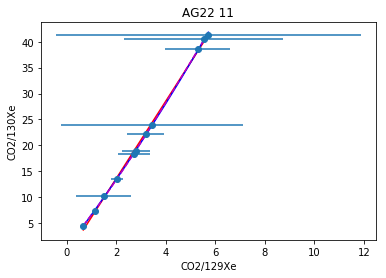

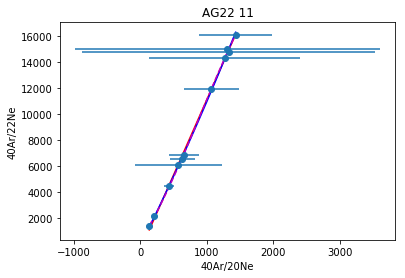

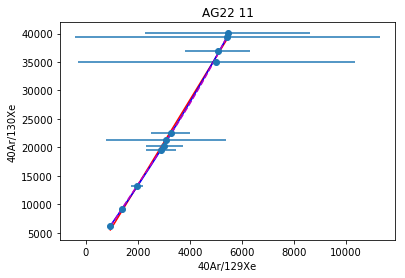

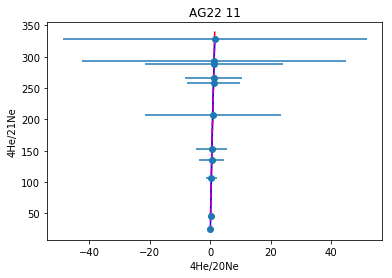

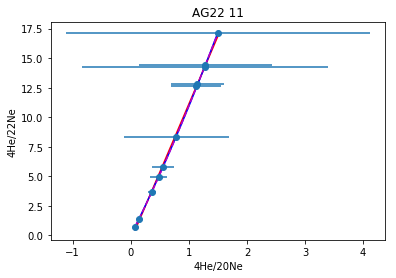

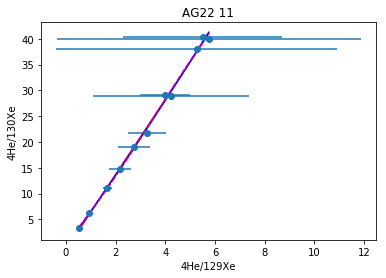

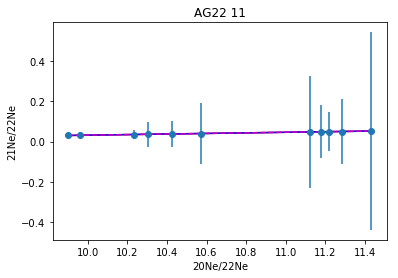

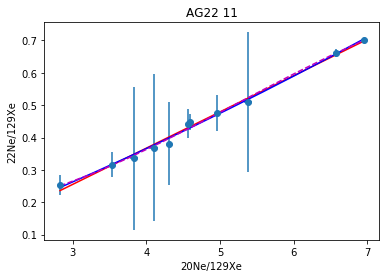

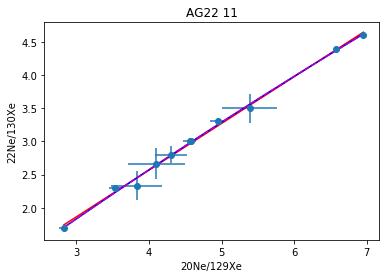

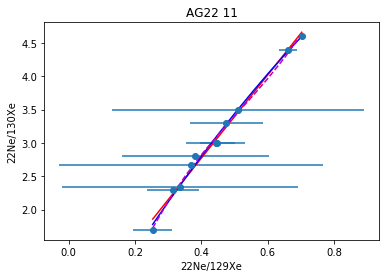

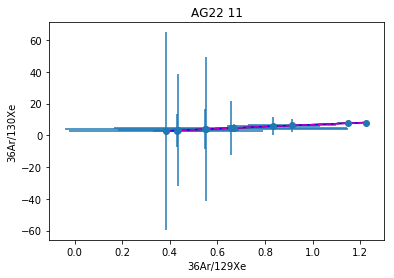

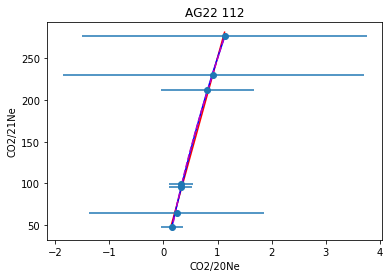

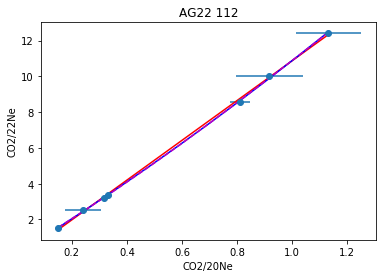

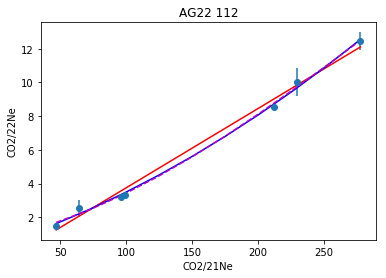

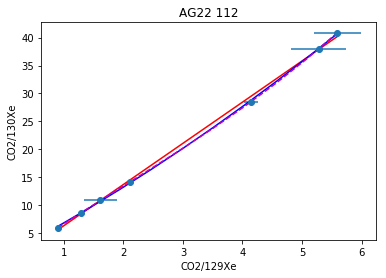

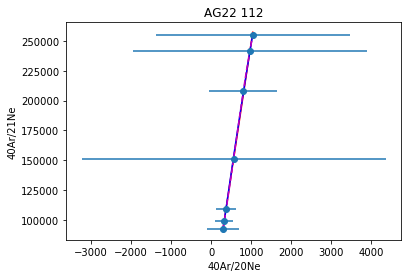

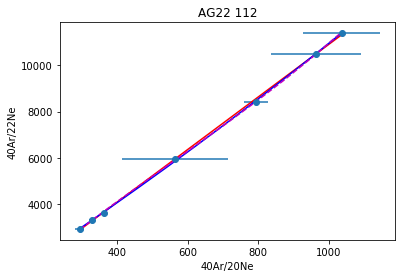

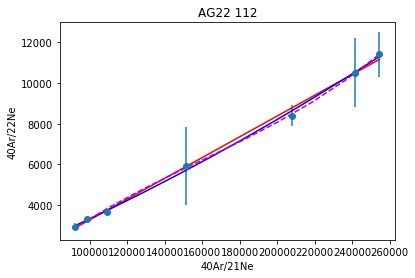

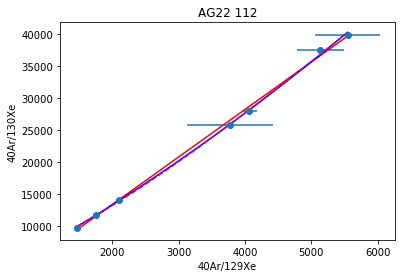

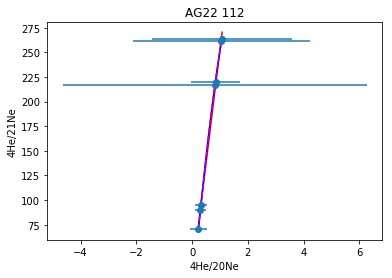

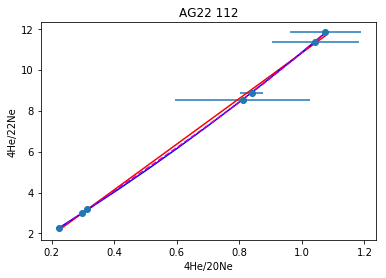

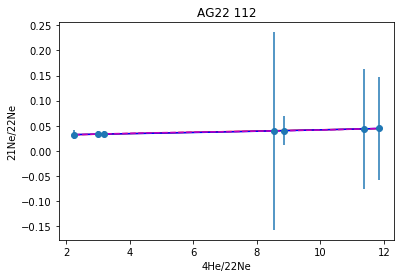

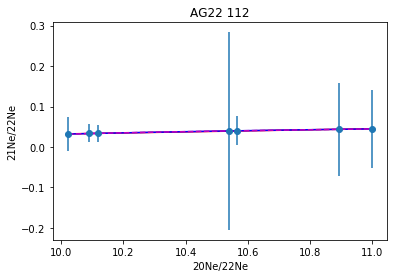

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in less


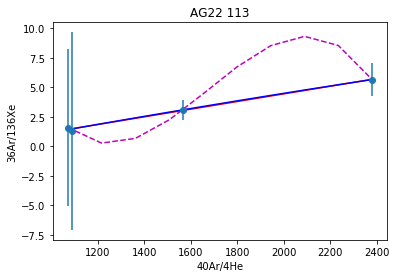

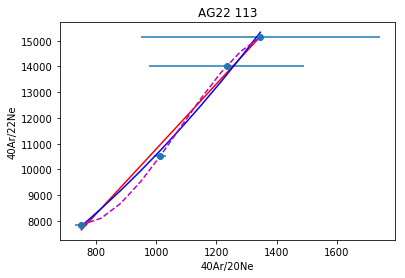

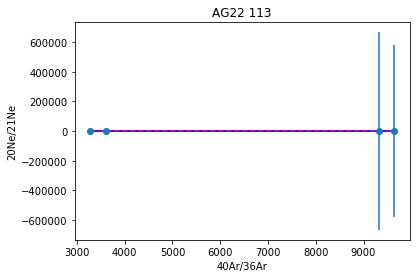

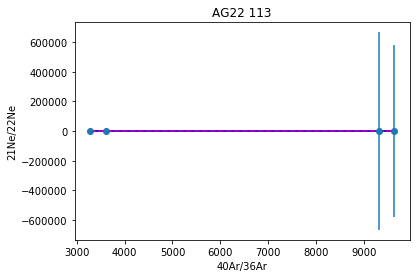

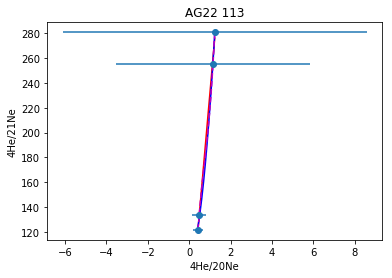

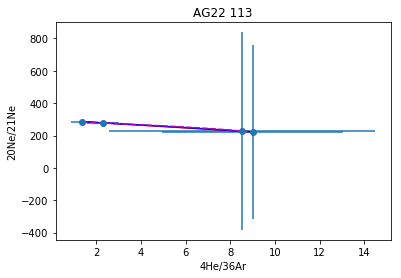

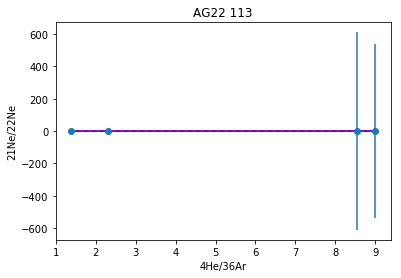

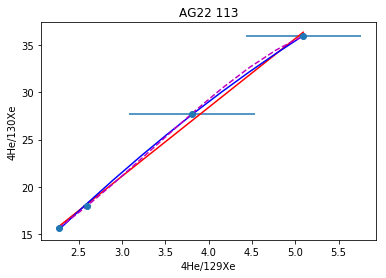

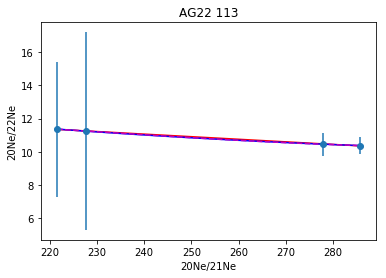

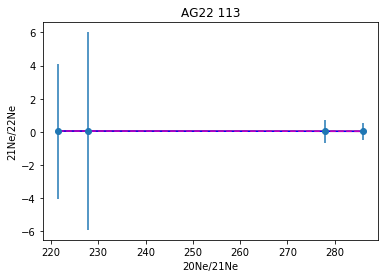

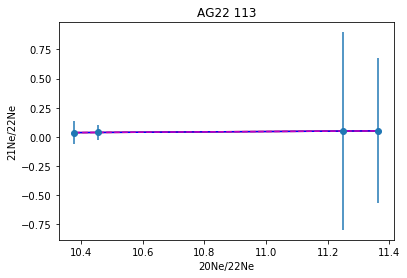

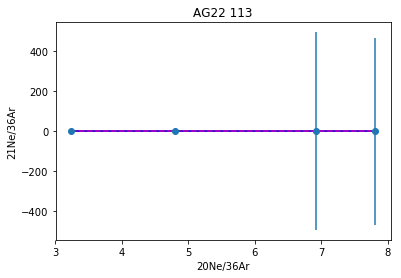

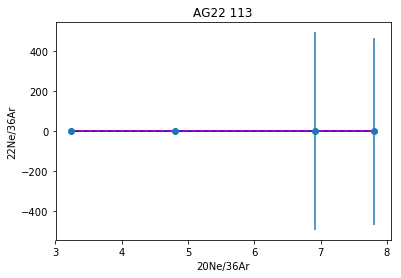

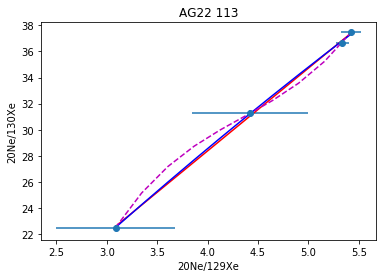

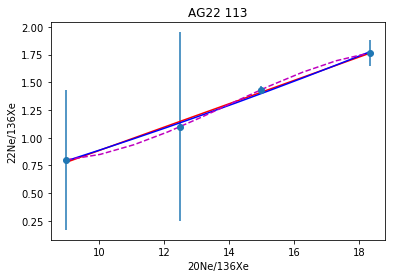

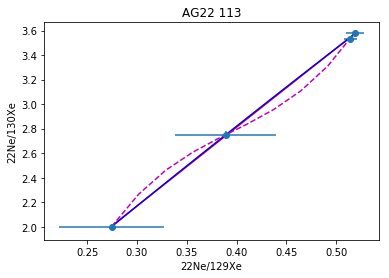

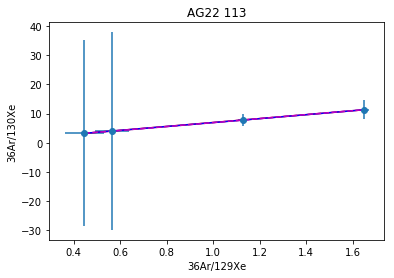

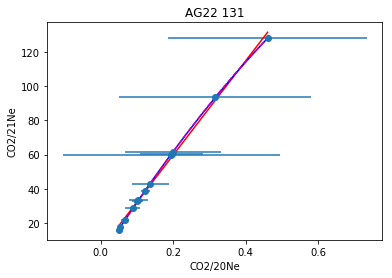

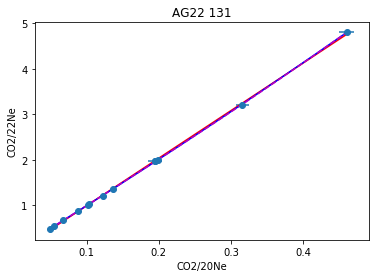

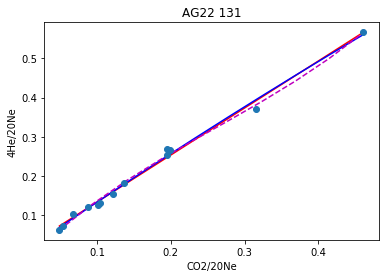

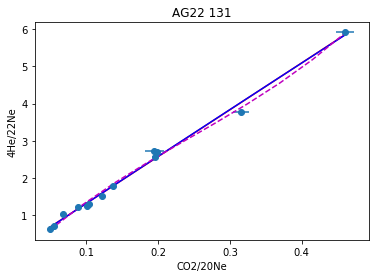

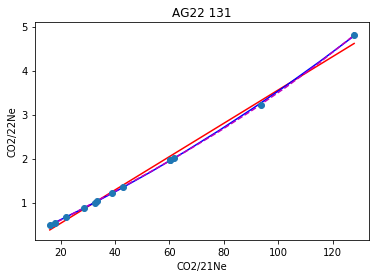

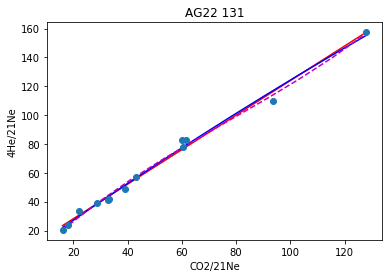

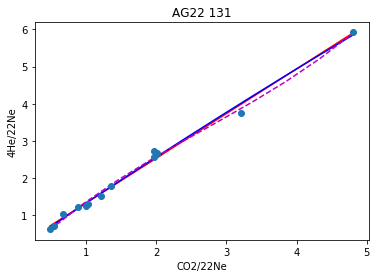

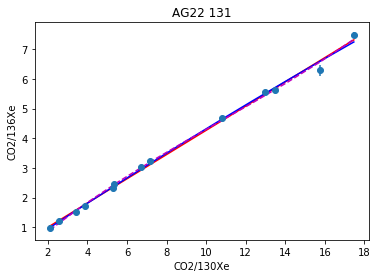

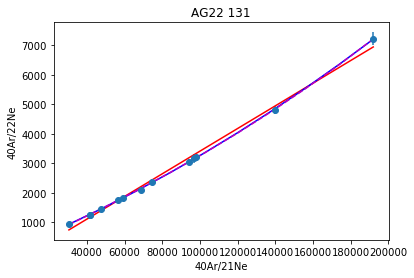

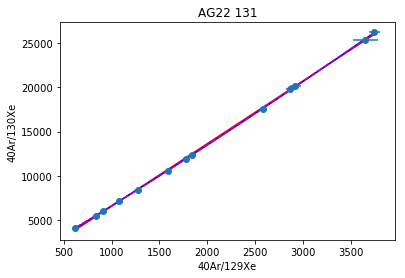

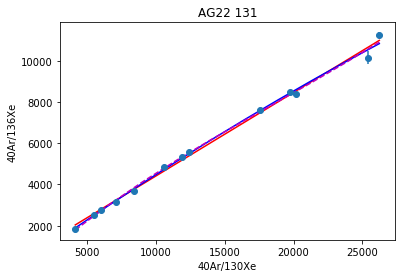

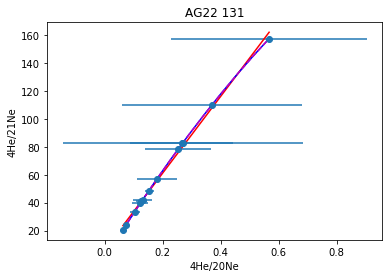

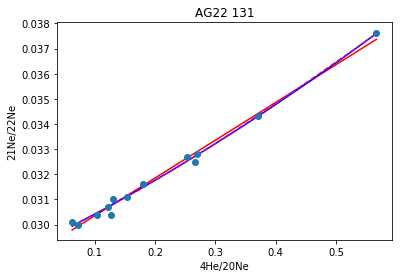

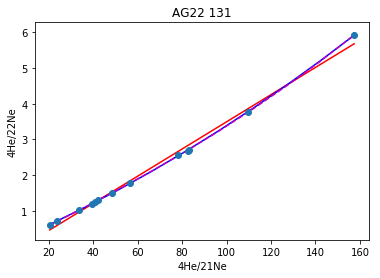

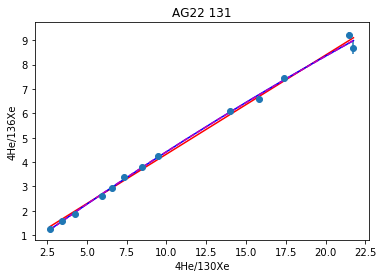

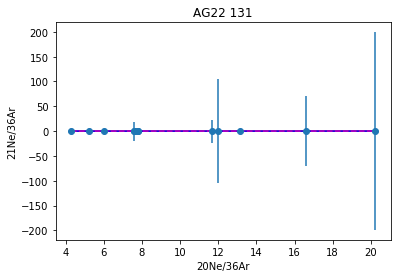

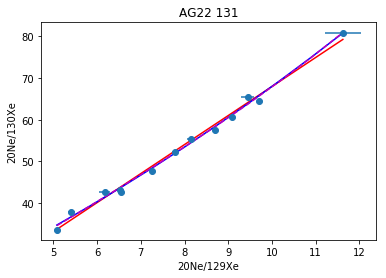

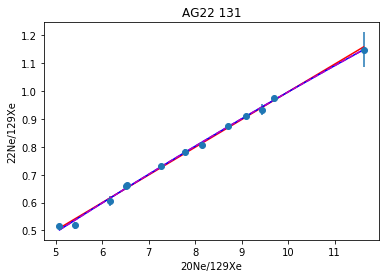

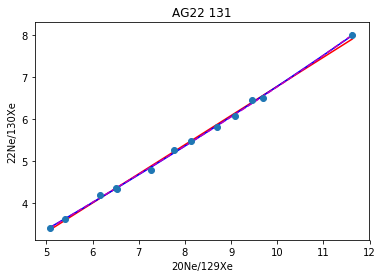

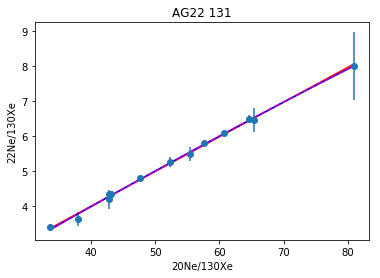

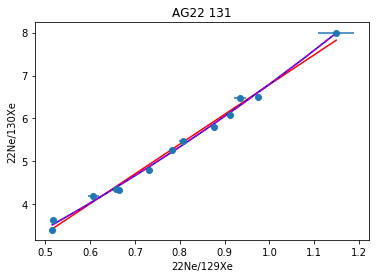

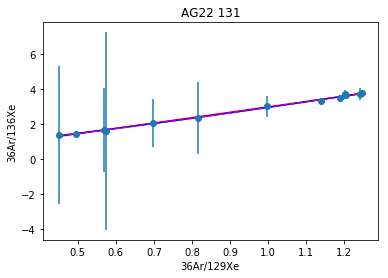

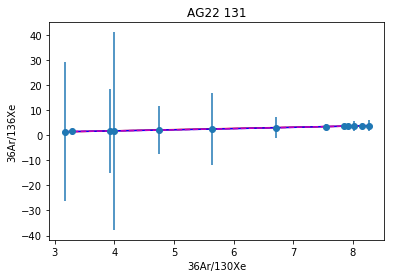

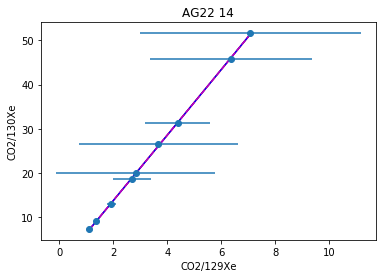

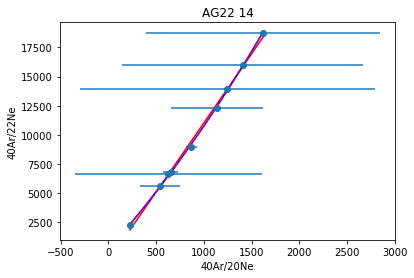

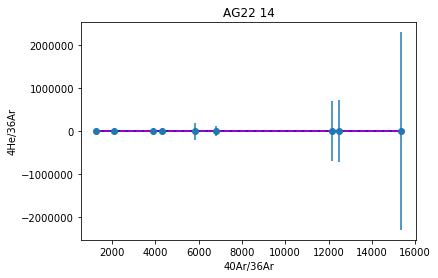

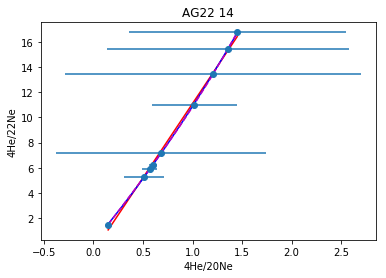

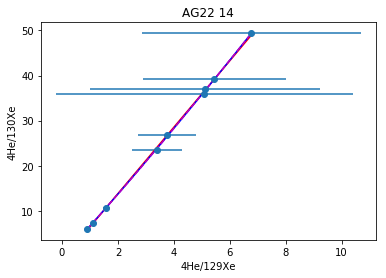

KeyboardInterrupt: 

In [10]:
#This plots the ratios and the error on a plot

for samp in unique_sample:

    names,the_r2 = get_r2(sample_dict, samp)

    for i in range(len(names)):
        #This creates new array to add the calculated errors.
        xdataerr = []
        ydataerr = []
        
        #These produce label names
        xaxis = names[i][0:1][0] + "/" + names[i][1:2][0]
        yaxis = names[i][2:3][0] + "/" + names[i][3:4][0]

        #These gets the data
        xdata = sample_dict[samp][names[i][0:1][0]] / sample_dict[samp][names[i][1:2][0]]
        ydata = sample_dict[samp][names[i][2:3][0]] / sample_dict[samp][names[i][3:4][0]]
        
        #Start of Hrag's code
        p1 = polyfit(xdata,ydata,1)
        p2 = polyfit(xdata,ydata,2)
        p3 = polyfit(xdata,ydata,3)
        #plot(xdata,polyval(p1,xdata))
        xvals = linspace(amin(xdata),amax(xdata),10)
        plot(xvals,polyval(p1,xvals), 'r')
        plot(xvals,polyval(p2,xvals), 'b-')
        plot(xvals,polyval(p3,xvals), 'm--')
        #numpy.polyfit(xdata,ydata,2)
        
        #These create the error name. ex '20Neerr'
        xw1 = names[i][0:1][0] + str('err') #error name of numerator of xdata
        xw2 = names[i][1:2][0] + str('err') #error name of denominator of xdata
        
        #These collects the x sample data and error
        xa = sample_dict[samp][names[i][0:1][0]] #numerator of xdata
        xb = sample_dict[samp][names[i][1:2][0]] #denominator of xdata
        xx = sample_dict[samp][xw1] #error of numerator of xdata
        xy = sample_dict[samp][xw2] #error of denominator of xdata
        
        #The above have nan's so convert nan to 0
        xa = nan_to_num(xa)
        xb = nan_to_num(xb)
        xx = nan_to_num(xx)
        xy = nan_to_num(xy)
        xdata = nan_to_num(xdata)

        for i in range(len(xa)):
            xz = xdata[i]*sqrt((xx[i]/xa[i])**2 + (xy[i]/xb[i])**2)
            xdataerr.append(xz)
        
        #now repeat for the y
        #These create the error name. ex '20Neerr'
        yw1 = names[i][2:3][0] + str('err') #error name of numerator of ydata
        yw2 = names[i][3:4][0] + str('err') #error name of denominator of ydata
        
        #These collects the y sample data and error
        ya = sample_dict[samp][names[i][2:3][0]] #numerator of ydata
        yb = sample_dict[samp][names[i][3:4][0]] #denominator of ydata
        yx = sample_dict[samp][yw1] #error of numerator of ydata
        yy = sample_dict[samp][yw2] #error of denominator of ydata        
        
        #The above have nan's so convert nan to 0
        ya = nan_to_num(ya)
        yb = nan_to_num(yb)
        yx = nan_to_num(yx)
        yy = nan_to_num(yy)
        ydata = nan_to_num(ydata)
        
        for i in range(len(xa)):
            yz = ydata[i]*sqrt((yx[i]/ya[i])**2 + (yy[i]/yb[i])**2)
            ydataerr.append(yz)

        #These plot the data in a pretty way
        PP.errorbar(xdata,ydata,xdataerr,ydataerr, fmt='o')
        PP.xlabel(xaxis)
        PP.ylabel(yaxis)
        PP.title(samp)
        PP.show()

In [11]:
def how_many(input_dictionary, sample_name, input_r2):
    element_list = ['CO2','40Ar','4He','20Ne','21Ne','22Ne','36Ar','129Xe','130Xe','136Xe']
    sample1 = input_dictionary[sample_name]
    """ do everything the same as up there"""
    ratio = []
    ratio_names = []
 
    for i in range(len(element_list)):
        for j in range(i+1,len(element_list)):
            ratio.append(sample1[element_list[i]]/sample1[element_list[j]])
            ratio_names.append([element_list[i],element_list[j]])
    ratio = array(ratio)
#     ratio_names = array(ratio_names)
 
    r2 = []
    axis_name = []
    isize, jsize = shape(ratio) # shape of ratio broken into 2 variables 
    for i in range(isize):
        for j in range(i+1, isize):
            r2.append(corrcoef(ratio[i],ratio[j])[0,1] ** 2)
            axis_name.append(concatenate([ratio_names[i],ratio_names[j]]))
    r2 = array(r2)
    axis_name = array(axis_name)
#     axis_name = concatenate(axis_name)
    
    ind = where (r2 > input_r2)[0]
    #output_r2 = len(r2)
    count = 0
    for value in r2:
        if value >= input_r2:
            count = count + 1
    return count
    
    return axis_name[ind], r2[ind]
 
allr2 = []
for i in range(len(unique_sample)):
    i = unique_sample[i]
    count = how_many(sample_dict, i, .99)
    allr2.append(count)

print('The amount of plots that have r2 greater than .99 is:', sum(allr2))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in divide


('The amount of plots that have r2 greater than .99 is:', 330)


In [ ]:
#This plots the ratios and the error on a plot

for samp in unique_sample:

    names,the_r2 = get_r2(sample_dict, samp)

    for i in range(len(names)):
        #This creates new array to add the calculated errors.
        xdataerr = []
        ydataerr = []
        
        #These produce label names
        xaxis = names[i][0:1][0] + "/" + names[i][1:2][0]
        yaxis = names[i][2:3][0] + "/" + names[i][3:4][0]

        #These gets the data
        xdata = sample_dict[samp][names[i][0:1][0]] / sample_dict[samp][names[i][1:2][0]]
        ydata = sample_dict[samp][names[i][2:3][0]] / sample_dict[samp][names[i][3:4][0]]
        
        #Start of Hrag's code
        p1 = polyfit(xdata,ydata,1)
        p2 = polyfit(xdata,ydata,2)
        p3 = polyfit(xdata,ydata,3)
        #plot(xdata,polyval(p1,xdata))
        xvals = linspace(amin(xdata),amax(xdata),10)
        plot(xvals,polyval(p1,xvals), 'r')
        plot(xvals,polyval(p2,xvals), 'b-')
        plot(xvals,polyval(p3,xvals), 'm--')
        #numpy.polyfit(xdata,ydata,2)
        
        #These create the error name. ex '20Neerr'
        xw1 = names[i][0:1][0] + str('err') #error name of numerator of xdata
        xw2 = names[i][1:2][0] + str('err') #error name of denominator of xdata
        
        #These collects the x sample data and error
        xa = sample_dict[samp][names[i][0:1][0]] #numerator of xdata
        xb = sample_dict[samp][names[i][1:2][0]] #denominator of xdata
        xx = sample_dict[samp][xw1] #error of numerator of xdata
        xy = sample_dict[samp][xw2] #error of denominator of xdata
        
        #The above have nan's so convert nan to 0
        xa = nan_to_num(xa)
        xb = nan_to_num(xb)
        xx = nan_to_num(xx)
        xy = nan_to_num(xy)
        xdata = nan_to_num(xdata)

        for i in range(len(xa)):
            xz = xdata[i]*sqrt((xx[i]/xa[i])**2 + (xy[i]/xb[i])**2)
            xdataerr.append(xz)
        
        #now repeat for the y
        #These create the error name. ex '20Neerr'
        yw1 = names[i][2:3][0] + str('err') #error name of numerator of ydata
        yw2 = names[i][3:4][0] + str('err') #error name of denominator of ydata
        
        #These collects the y sample data and error
        ya = sample_dict[samp][names[i][2:3][0]] #numerator of ydata
        yb = sample_dict[samp][names[i][3:4][0]] #denominator of ydata
        yx = sample_dict[samp][yw1] #error of numerator of ydata
        yy = sample_dict[samp][yw2] #error of denominator of ydata        
        
        #The above have nan's so convert nan to 0
        ya = nan_to_num(ya)
        yb = nan_to_num(yb)
        yx = nan_to_num(yx)
        yy = nan_to_num(yy)
        ydata = nan_to_num(ydata)
        
        for i in range(len(xa)):
            yz = ydata[i]*sqrt((yx[i]/ya[i])**2 + (yy[i]/yb[i])**2)
            ydataerr.append(yz)

        #These plot the data in a pretty way
        PP.errorbar(xdata,ydata,xdataerr,ydataerr, fmt='o')
        PP.xlabel(xaxis)
        PP.ylabel(yaxis)
        PP.title(samp)
        PP.show()

In [ ]:
asdf = [1,2,3,NaN]

asdf = nan_to_num(asdf)
asdf


In [ ]:
import random

In [ ]:
random.random

In [ ]:
help(random.random)

In [ ]:
# this is to plot and check that we are calling the data correctly
PP.scatter((sample_dict['AG22 11']['CO2']/sample_dict['AG22 11']['4He']),(sample_dict['AG22 11']['20Ne']/sample_dict['AG22 11']['36Ar']))
PP.xlabel('$CO_{2}$/$^4He$')
PP.ylabel('$^{20}Ne$/$^{36}Ar$')

In [ ]:
num_elements = len(element_list)
nice_element_name = {}
granddic = { samp : {} for samp in unique_sample}

for samp in unique_sample:
    #this creates labels
    for i in range(num_elements): 
        #creates numerator
        element1 = element_list[i]
        #assign the actual value of numerator
        numerator = sample_dict[samp][element1]
        
        for j in range(i+1,num_elements):
            #creates denominator
            element2 = element_list[j]
            #Now to save the actual values of the numerator and demoninator
            denominator = sample_dict[samp][element2]
            granddic[samp]=[element1]
            granddic[samp]=[element2]
            
            #print(element1,element2)
#print nice_element_name['CO2']

In [ ]:
num_elements = len(element_list)
nice_element_name = {}
nice_element_name['CO2'] = 'CO^_2^' #dollar sign = subscript ^=superscript

elements1 = []
elements2 = []

#this is to create labels
for i in range(num_elements): 
    #creates numerator
    element1 = element_list[i]
    
    
    #creates denominator    
    for j in range(i+1,num_elements):
        element2 = element_list[j]
        
        print(element1,element2)
#print nice_element_name['CO2']

In [ ]:
# /data1 = array([sample1[element_list[i]]/sample1[element_list[j]])
# print shape(data1)
data1 = []
ratio = [] #this is something Hector added
for i in range(len(element_list)):
    for j in range(i+1,len(element_list)):
        data1.append(sample1[element_list[i]]/sample1[element_list[j]])
        ratio.append(element_list[i] + '/' + element_list[j]) #also something Hector added
data1 = array(data1)   
print(ratio)

In [ ]:
#
r2 = []
axis_name = []
isize, lsize = shape(data1)
for i in range(isize):
    for j in range(i+1, isize):
        r2.append(corrcoef(data1[i,:],data1[j,:])[0,1] ** 2)
        axis_name.append(ratio[i] + ' to ' + ratio[j])
print(axis_name)
axis_name = array(axis_name)

r2 = array(r2)